# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Aguilar.
- Nombre de alumno 2: Sebastián Vásquez.


### **Link de repositorio de GitHub:** `https://github.com/sbstnvsqz0/MDS7202`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1. Este se trata de un motor unificado de analíticas para el procesamiento de datos a gran escala. Las ventajas sobre pandas son:
- La gestión de memoria es más eficiente, esto ya que utiliza lazy evaluation, donde se planifican las operaciones, no ejecutandose al instante. Además pandas cuenta con inferencia automática de tipo de datos, lo cual puede traer problemas de memoria.
- El desempeño con grandes volumenes de datos mejora, pues spark puede operarlos y ejecutar operaciones de forma paralela.
- Soporte de computación paralela (pandas no tiene esta opción debido a su diseño).
2. Son colecciones de elementos tolerantes a fallas y altamente escalables, que se pueden distribuir en un cluster para poder trabajar en paralelo. Una de sus principales características son las particiones, que son divisiones del conjunto de datos para ayudar al procesamiento, estas pueden tener tamaño variable y ayudan al paralelismo. Los dataframes son básicamente abstracciones más altas que los RDD con mejor interfaz y optimizaciones automáticas, pero ambos son colecciones de datos.
3. Las acciones devuelven un valor tras ejecutarse sobre el conjunto de datos y ejecutan las transformaciones, en cambio la transformación crea un nuevo conjunto de datos a partir de otro RDD, sin embargo, solo se ejecutan luego de una acción. Ejemplos de acciones son show() para mostrar un RDD/df, count() para contar elementos, etc. Ejemplos de transformaciones son select() para seleccionar algunas columnas, o groupBy() para agrupar según cierta variable. Antes de ejecutar la acción se optimiza el plan de ejecución de las transformaciones acumuladas, luego paraleliza tareas y se devuelven resultados al controlador
4. El particionamiento es importante para el rendimiento del procesamiento de datos, pues estas particiones se distribuyen entre los nodos de tal manera de poder hacer procesamientos en paralelo sobre un set de datos grande y así aumentar la eficiencia de las consultas.
5. - El Spark Driver es el programa principal encargado de ejecutar el código (interactua con entorno del usuario) y ordenar las operaciones en los clusters. Este envía trabajo a executors y obtiene los resultados finales.
  - El Spark Executor se encarga de el procesamiento de datos enviado por el driver en los clusters. Cada uno de estos ejecutan tareas en el trabajo distribuido.  
6. Cataclyst Optimizer es un optimizador que aprovecha características de lenguaje de programación para construir un optimizador de consultas. Este contiene bibliotecas para el procesamiento de consultas relacionales. Cataclyst recibe una querie en un lenguaje de alto nivel y las transforma en transformaciones map-reduce.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a1f26bbd7c418df5d7408ae7b30cfe639db01c61232d1d54ecb5f76c76a7fb94
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [3]:
# Se obtienen los datos
%%capture
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

In [49]:
sparksession = SparkSession.builder.master("local").appName("Lab4").getOrCreate()

In [50]:
df_lab = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")

)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [51]:
#1.
df_lab.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [52]:
#2
df_lab.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [53]:
#3
df_lab.sample(fraction=0.05).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|d936a024-3a1d-40d...|1bac88d6-4b22-409...|            134.19|2023-06-01 00:00:00|        PayPal|   home & garden|     2.0|        22.0|       Davismouth|     tablet|   76.63.88.212|     

In [54]:
#4
df_lab.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

**Con respecto a las columnas con tipo equivocado, entre estas se encuentras las siguientes:**
- Quantity -> de double a int
- Customer Age -> de double a int
- Is An Alien -> de double a boolean o int
- Account Age Days -> de double a int
- Transaction Hour -> de double a int

In [55]:
#5 (Se usaron solo tipos que estaban importados anteriormente) Se usa función vista en clases
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

cols_to_cast = {"Quantity": IntegerType(),
                "Customer Age": IntegerType(),
                "Is An Alien": IntegerType(),
                "Account Age Days": IntegerType(),
                "Transaction Hour": IntegerType()}

df_lab = cast_columns(df_lab,cols_to_cast)
df_lab.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: integer (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [56]:
# 6
from pyspark.sql.functions import when, col, sum
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df_lab.columns]
df_lab.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [57]:
# 7
df_lab = df_lab.na.drop(how="any")

In [58]:
df_lab.count()

13388

In [59]:
# 8 datos duplicados: están indexados por Transaction ID, con lo cual se buscarán duplicados ahí
df_lab = df_lab.dropDuplicates(["Transaction ID"])

In [60]:
df_lab.count()

13237

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [61]:
#1
from pyspark.sql.functions import log, abs
df_lab = df_lab.withColumn('Transaction bp',log(48+abs(df_lab['Transaction Amount'])**36))

In [62]:
#2
from pyspark.sql.functions import month
df_lab = df_lab.withColumn('Transaction Month', month(df_lab["Transaction Date"]))

In [63]:
#3
from pyspark.sql.functions import when
df_lab = df_lab.withColumn('Type of purchase', when(df_lab["Quantity"]>5,"Compra mayorista").otherwise("Compra minorista"))

In [64]:
df_lab.filter(df_lab["Quantity"]>5).show() # POR LO FILTRADO NO HAY COMPRAS MAYORES A 5

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

In [65]:
#4
df_lab.filter((df_lab["Is An Alien"]==1) & (df_lab["Type of purchase"]=="Compra mayorista")).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

In [66]:
#5
df_lab_groups = df_lab.groupBy("Is An Alien").agg(
    {
        "Transaction ID" : "count"
    }
)

In [67]:
df_lab_groups.show()

+-----------+---------------------+
|Is An Alien|count(Transaction ID)|
+-----------+---------------------+
|          1|                  685|
|          0|                12552|
+-----------+---------------------+



In [68]:
# 6
df_plot = df_lab.groupBy("Payment Method").pivot("Is An Alien").mean("Transaction Amount")
df_plot.show()

+--------------+------------------+-----------------+
|Payment Method|                 0|                1|
+--------------+------------------+-----------------+
|    debit card|215.66604264659748|549.4418644067796|
| bank transfer|  214.751203556685|550.3845930232562|
|        PayPal| 214.8426181936741|469.5177647058822|
|   credit card|206.09774070543347|520.4671686746989|
+--------------+------------------+-----------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [ ]:
# 1
df_pandas = df_lab.toPandas()

In [ ]:
df_pandas.groupby(['Is An Alien',"Payment Method"]).mean("Transaction Amount").reset_index()

,Is An Alien,Payment Method,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Transaction bp,Transaction Month
0,0,PayPal,214.842618,2.986306,34.448647,182.734594,11.323443,176.593334,6.512227
1,0,bank transfer,214.751204,3.001270,34.312798,183.211496,11.639886,177.577971,6.472213
2,0,credit card,206.097741,3.045758,34.352081,183.261837,11.279631,175.485904,6.542421
3,0,debit card,215.666043,2.957353,34.615867,181.415491,11.328316,177.503965,6.502979
4,1,PayPal,469.517765,2.964706,34.088235,120.976471,7.623529,196.858898,6.552941
5,1,bank transfer,550.384593,2.965116,34.703488,111.494186,7.401163,198.296804,6.726744
6,1,credit card,520.467169,3.186747,34.108434,118.168675,7.265060,200.348209,6.289157
7,1,debit card,549.441864,2.988701,33.265537,121.028249,7.604520,198.419840,6.050847


In [ ]:
# 2
px.bar(
    df_pandas.groupby(['Is An Alien',"Payment Method"]).mean("Transaction Amount").reset_index(),
    x='Is An Alien',
    y='Transaction Amount',
    color = "Payment Method",
    template='simple_white',
    barmode='group'
)

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.




### Respuestas
1. En este caso se decidió hacer la partición de la tabla utilizando de columna referencia el Customer ID, pues es lo que hace más sentido al hacer consultas: el consultar haciendo referencia a quien hizo la transacción, pudiendo así ayudar a la optimización de estas. Además, esto se puede distribuir fácilmente haciendo algún hashing sobre el dígito de más a la derecha en hexadecimal de esta variable, pues por el gráfico visto abajo, cada dígito tiene más o menos la misma cantidad de ID customers asociados. En ese sentido se particiona en 16 particiones con alrededor de 800 datos cada una.


In [21]:
def ultimo_digito(df):
  lista_hexa = [hex(k)[-1]+"%" for k in range(16)]
  cantidades = {}
  for i in range(len(lista_hexa)):
    cantidades[lista_hexa[i]] = df.filter(df_lab["Customer ID"].like(lista_hexa[i])).count()
  return cantidades

In [22]:
ultimo_digito_df = ultimo_digito(df_lab)

Text(0.5, 0.98, 'Conteo de comienzos de ID Customer')

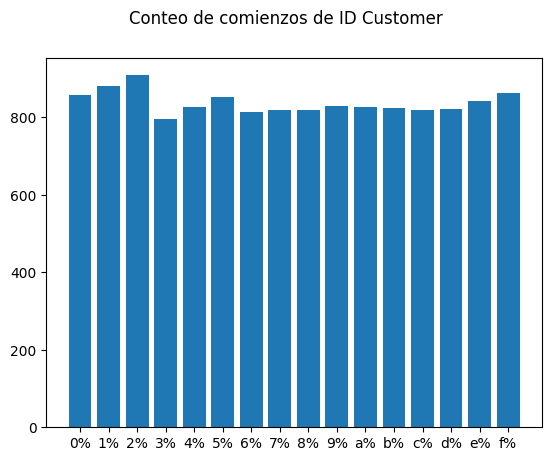

In [25]:
plt.bar(ultimo_digito_df.keys(),ultimo_digito_df.values())
plt.suptitle("Conteo de comienzos de ID Customer")

In [72]:
df_lab.coalesce(16).write.partitionBy("Customer ID").saveAsTable(name='P5_16p')

2. **Consulta SQL para Principales Clientes**:

La consulta es como sigue:


```{SQL}
SELECT Customer ID ,COUNT(Transaction ID) as Conteo_Compras
FROM P5_16p
GROUP BY Customer ID
ORDER BY Conteo_Compras DESC LIMIT 10
```


A continuación se prueba:

In [82]:
sparksession.sql("SELECT {0} ,COUNT({2}) as Conteo_Compras FROM P5_16p GROUP BY {1} ORDER BY Conteo_Compras DESC LIMIT 10".format("`Customer ID`","`Customer ID`","`Transaction ID`")).show()

+--------------------+--------------+
|         Customer ID|Conteo_Compras|
+--------------------+--------------+
|fc5e4b5a-11e3-4ab...|             1|
|1e319288-655e-497...|             1|
|295b66aa-3356-48f...|             1|
|74d7d2d1-9dad-433...|             1|
|fe1c12b4-a0ee-42e...|             1|
|31709f25-8ef6-434...|             1|
|c775f99e-de4b-405...|             1|
|61c97fd8-9572-4f3...|             1|
|60faae1f-f306-486...|             1|
|7a34321a-3dac-4b6...|             1|
+--------------------+--------------+



3 . **Implementación de Función de Ventana en SQL y Equivalente en Spark**


La Querie sería algo como lo que sigue:


```{SQL}
SELECT Customer ID, Transaction Amount
FROM (SELECT Customer ID, Transaction Amount, ROW_NUMBER() OVER (PARTITION BY Customer ID ORDER BY Transaction Amount DESC) AS r
      FROM p5_16p
      WHERE TIMESTAMPDIFF(MONTH,Transaction Month,NOW()) <=3) AS
WHERE r = 1;
```
Esto se podría implementar en pyspark, primero filtrando con el timestampdiff, luego para el df resultante, agregando una columna r donde se lleve el orden de compra según el Transaction Amount para cada Customer ID. Luego la querie es simplemente hacer un .filter con r=1.



### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [ ]:
# Código Aquí